# Google Colab Notebook: Public Health Analysis

## Task 1: Data Preprocessing and Feature Engineering

### 1.1 Load the Raw Data

The first step in data analysis is to load the raw dataset into the working environment. I began by uploading and loading the dataset into a pandas DataFrame, which makes it easier to manipulate and analyze the data.

*Explanation:*

* The dataset is in CSV format and contains various columns with
information about life expectancy, mortality rates, population, health-related indicators, and economic factors for different countries and years.

* I used pandas.read_csv() to read the file and stored the data in a variable df.

In [1]:

# Import necessary libraries
import pandas as pd
from google.colab import files

# Upload the dataset manually
uploaded = files.upload()

# Load the dataset (replace 'Life_Expectancy_Data (1).csv' with your actual file name)
df = pd.read_csv('Life_Expectancy_Data (1).csv')

# Display the first few rows of the dataset
df.head()


Saving Life_Expectancy_Data (1).csv to Life_Expectancy_Data (1).csv


Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

### 1.2 Perform Feature Engineering
Feature engineering is the process of transforming raw data into features that can be used for analysis or modeling. For this task, I created four new features based on the existing columns.

#### 1.2.1 Population Size
I created a new feature called "Population Size," which categorizes countries into three population groups based on their population count. The categories are:

* Small: Population between 1,000 and 29,999

* Medium: Population between 30,000 and 99,999

* Large: Population of 100,000 or more

*Explanation:*

This categorization helps in understanding how population size impacts life expectancy and allows for easier analysis of countries with similar population characteristics.

In [2]:

# Creating a Population Size feature
def categorize_population(population):
    if population >= 100000:
        return 'Large'
    elif population >= 30000:
        return 'Medium'
    else:
        return 'Small'

df['Population Size'] = df['Population'].apply(categorize_population)

# Display the first few rows to check the new feature
df[['Country', 'Year', 'Population', 'Population Size']].head()


Country  Year  Population Population Size
0  Afghanistan  2015  33736494.0           Large
1  Afghanistan  2014    327582.0           Large
2  Afghanistan  2013  31731688.0           Large
3  Afghanistan  2012   3696958.0           Large
4  Afghanistan  2011   2978599.0           Large

from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Year', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Population']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Population')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

#### 1.2.2 Lifestyle Feature (Combining Alcohol Consumption and BMI)
I created a new feature called "Lifestyle" that combines alcohol consumption and Body Mass Index (BMI). This was done by adding the values of alcohol consumption and BMI for each country and year.
*Explanation:*

* Combining alcohol consumption and BMI into one feature can provide insights into the overall lifestyle of the population, which may correlate with life expectancy.

In [11]:
# Creating a Lifestyle feature
df['Lifestyle'] = df['Alcohol'] + df[' BMI ']

# Display the first few rows to check the new feature
df[['Country', 'Year', 'Alcohol', ' BMI ', 'Lifestyle']].head()

Country  Year  Alcohol   BMI   Lifestyle
0  Afghanistan  2015     0.01   19.1      19.11
1  Afghanistan  2014     0.01   18.6      18.61
2  Afghanistan  2013     0.01   18.1      18.11
3  Afghanistan  2012     0.01   17.6      17.61
4  Afghanistan  2011     0.01   17.2      17.21

from matplotlib import pyplot as plt
_df_37['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38[' BMI '].plot(kind='hist', bins=20, title=' BMI ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Lifestyle'].plot(kind='hist', bins=20, title='Lifestyle')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='Year', y=' BMI ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x=' BMI ', y='Lifestyle', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series[' BMI ']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel(' BMI ')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Lifestyle']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Lifestyle')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_44.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Alcohol']
  ys = series[' BMI ']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_45.sort_values('Alcohol', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Alcohol')
_ = plt.ylabel(' BMI ')

from matplotlib import pyplot as plt
_df_46['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47[' BMI '].plot(kind='line', figsize=(8, 4), title=' BMI ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_48['Lifestyle'].plot(kind='line', figsize=(8, 4), title='Lifestyle')
plt.gca().spines[['top', 'right']].set_visible(False)

#### 1.2.3 Economy Feature (Combining Population and GDP)
I created an "Economy" feature by multiplying the population with the Gross Domestic Product (GDP) for each country. This new feature serves as an indicator of the country’s economic status.

*Explanation:*

* Combining GDP with population helps in understanding the economic scale
of a country and its potential impact on public health outcomes, including life expectancy.

In [4]:

# Creating an Economy feature
df['Economy'] = df['Population'] * df['GDP']

# Display the first few rows to check the new feature
df[['Country', 'Year', 'GDP', 'Population', 'Economy']].head()


Country  Year         GDP  Population       Economy
0  Afghanistan  2015  584.259210  33736494.0  1.971086e+10
1  Afghanistan  2014  612.696514    327582.0  2.007083e+08
2  Afghanistan  2013  631.744976  31731688.0  2.004633e+10
3  Afghanistan  2012  669.959000   3696958.0  2.476810e+09
4  Afghanistan  2011   63.537231   2978599.0  1.892519e+08

from matplotlib import pyplot as plt
_df_7['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['GDP'].plot(kind='hist', bins=20, title='GDP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Economy'].plot(kind='hist', bins=20, title='Economy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Year', y='GDP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='GDP', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='Population', y='Economy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['GDP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('GDP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Population']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Population')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Economy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Economy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_18['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['GDP'].plot(kind='line', figsize=(8, 4), title='GDP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Economy'].plot(kind='line', figsize=(8, 4), title='Economy')
plt.gca().spines[['top', 'right']].set_visible(False)

#### 1.2.4 Death Ratio (Adult vs Infant Mortality)
I calculated a new feature called "Death Ratio," which represents the ratio of adult mortality to infant deaths. This ratio is important as it highlights the relative burden of adult versus infant mortality in different countries.

*Explanation:*

* By calculating this ratio, I can analyze which countries face higher mortality rates for adults compared to infants. This may reflect differences in healthcare access and disease burden.

In [12]:
# Creating a Death Ratio feature
df['Death Ratio'] = df['Adult Mortality'] / df['infant deaths']

# Display the first few rows to check the new feature
df[['Country', 'Year', 'Adult Mortality', 'infant deaths', 'Death Ratio']].head()

Country  Year  Adult Mortality  infant deaths  Death Ratio
0  Afghanistan  2015            263.0             62     4.241935
1  Afghanistan  2014            271.0             64     4.234375
2  Afghanistan  2013            268.0             66     4.060606
3  Afghanistan  2012            272.0             69     3.942029
4  Afghanistan  2011            275.0             71     3.873239

from matplotlib import pyplot as plt
_df_22['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Adult Mortality'].plot(kind='hist', bins=20, title='Adult Mortality')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['infant deaths'].plot(kind='hist', bins=20, title='infant deaths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Death Ratio'].plot(kind='hist', bins=20, title='Death Ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Year', y='Adult Mortality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='Adult Mortality', y='infant deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='infant deaths', y='Death Ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Adult Mortality']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Adult Mortality')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Death Ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Death Ratio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['infant deaths']
  ys = series['Adult Mortality']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('infant deaths', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('infant deaths')
_ = plt.ylabel('Adult Mortality')

from matplotlib import pyplot as plt
_df_33['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Adult Mortality'].plot(kind='line', figsize=(8, 4), title='Adult Mortality')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['infant deaths'].plot(kind='line', figsize=(8, 4), title='infant deaths')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['Death Ratio'].plot(kind='line', figsize=(8, 4), title='Death Ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

### 1.3 Summary of the New Features
Finally, after creating these new features, I summarized the data to check the statistics and distributions of all features, ensuring that the feature engineering process was successful.

*Explanation:*

* The describe() function provides a statistical summary, such as mean, median, and standard deviation, for all the numerical features in the dataset.

* This summary allows me to quickly assess the distribution and range of values for each feature.

In [6]:

# Display summary of all features
df.describe()


Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths   ...  Total expenditure  Diphtheria   \
count  2904.000000         2938.000000  ...         2712.00000  2919.000000   
mean     38.321247           42.035739  ...            5.93819    82.324084   
std      20.044034          160.445548  ...            2.49832    23.716912   
min       1.000000            0.000000  ...            0.37000     2.000000   
25%      19.300000            0.000000  ...            4.26000    78.000000   
50%      43.500000            4.000000  ...            5.75500    93.000000   
75%      56.200000           28.000000  ...            7.49250    97.000000   
max      87.300000         2500.000000  ...           17.60000    99.000000   

          HIV/AIDS            GDP    Population   thinness  1-19 years  \
count  2938.000000    2490.000000  2.286000e+03            2904.000000   
mean      1.742103    7483.158469  1.275338e+07               4.839704   
std       5.077785   14270.169342  6.101210e+07               4.420195   
min       0.100000       1.681350  3.400000e+01               0.100000   
25%       0.100000     463.935626  1.957932e+05               1.600000   
50%       0.100000    1766.947595  1.386542e+06               3.300000   
75%       0.800000    5910.806335  7.420359e+06               7.200000   
max      50.600000  119172.741800  1.293859e+09              27.700000   

        thinness 5-9 years  Income composition of resources    Schooling  \
count          2904.000000                      2771.000000  2775.000000   
mean              4.870317                         0.627551    11.992793   
std               4.508882                         0.210904     3.358920   
min               0.100000                         0.000000     0.000000   
25%               1.500000                         0.493000    10.100000   
50%               3.300000                         0.677000    12.300000   
75%               7.200000                         0.779000    14.300000   
max              28.600000                         0.948000    20.700000   

            Economy  
count  2.264000e+03  
mean   6.141857e+10  
std    2.616712e+11  
min    9.614600e+03  
25%    2.170533e+08  
50%    1.689357e+09  
75%    1.602575e+10  
max    3.439953e+12  

[8 rows x 21 columns]

In [9]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Population Size',
       'Economy'],
      dtype='object')


# **TASK 2:Data Cleaning and Analysis**

**1. Checking for Missing Values**

*Explanation:*

In the first part of Task 2, the goal was to check for missing values in the dataset. The missing_data variable contains the sum of missing values for each column in the dataset. This step helps in identifying whether any data needs to be imputed or removed.

The output shows that Alcohol, Hepatitis B, and Lifestyle columns had missing values before cleaning. After performing the cleaning, either by dropping rows or imputing values, no missing values remain.

In [13]:
# Checking for missing values in the dataset
missing_data = df.isnull().sum()

# If there are any missing values, we can handle them
# Option 1: Drop rows with missing values
df_cleaned = df.dropna()

# Option 2: Impute missing values (e.g., fill with the mean of each column)
# df_cleaned = df.fillna(df.mean())

# Displaying the number of missing values after cleaning
print(f"Missing values before cleaning:\n{missing_data}")
print(f"\nMissing values after cleaning:\n{df_cleaned.isnull().sum()}")


Missing values before cleaning:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Population Size                      0
Economy                            674
Lifestyle                       

*Output:*

* Before cleaning, there were missing values for certain columns.

* After cleaning, all columns were free of missing data.

**2. Generating Scatter Plots**

*Explanation:*

Next, scatter plots are generated to visualize the relationship between each predictor (independent variable) and the target variable (Life expectancy). This helps in understanding how each predictor is linearly related to life expectancy.

The scatter plots visualize:

* How Adult Mortality, Alcohol, GDP, and other variables relate to life expectancy.
* Some predictors show clear linear trends, while others are more scattered.

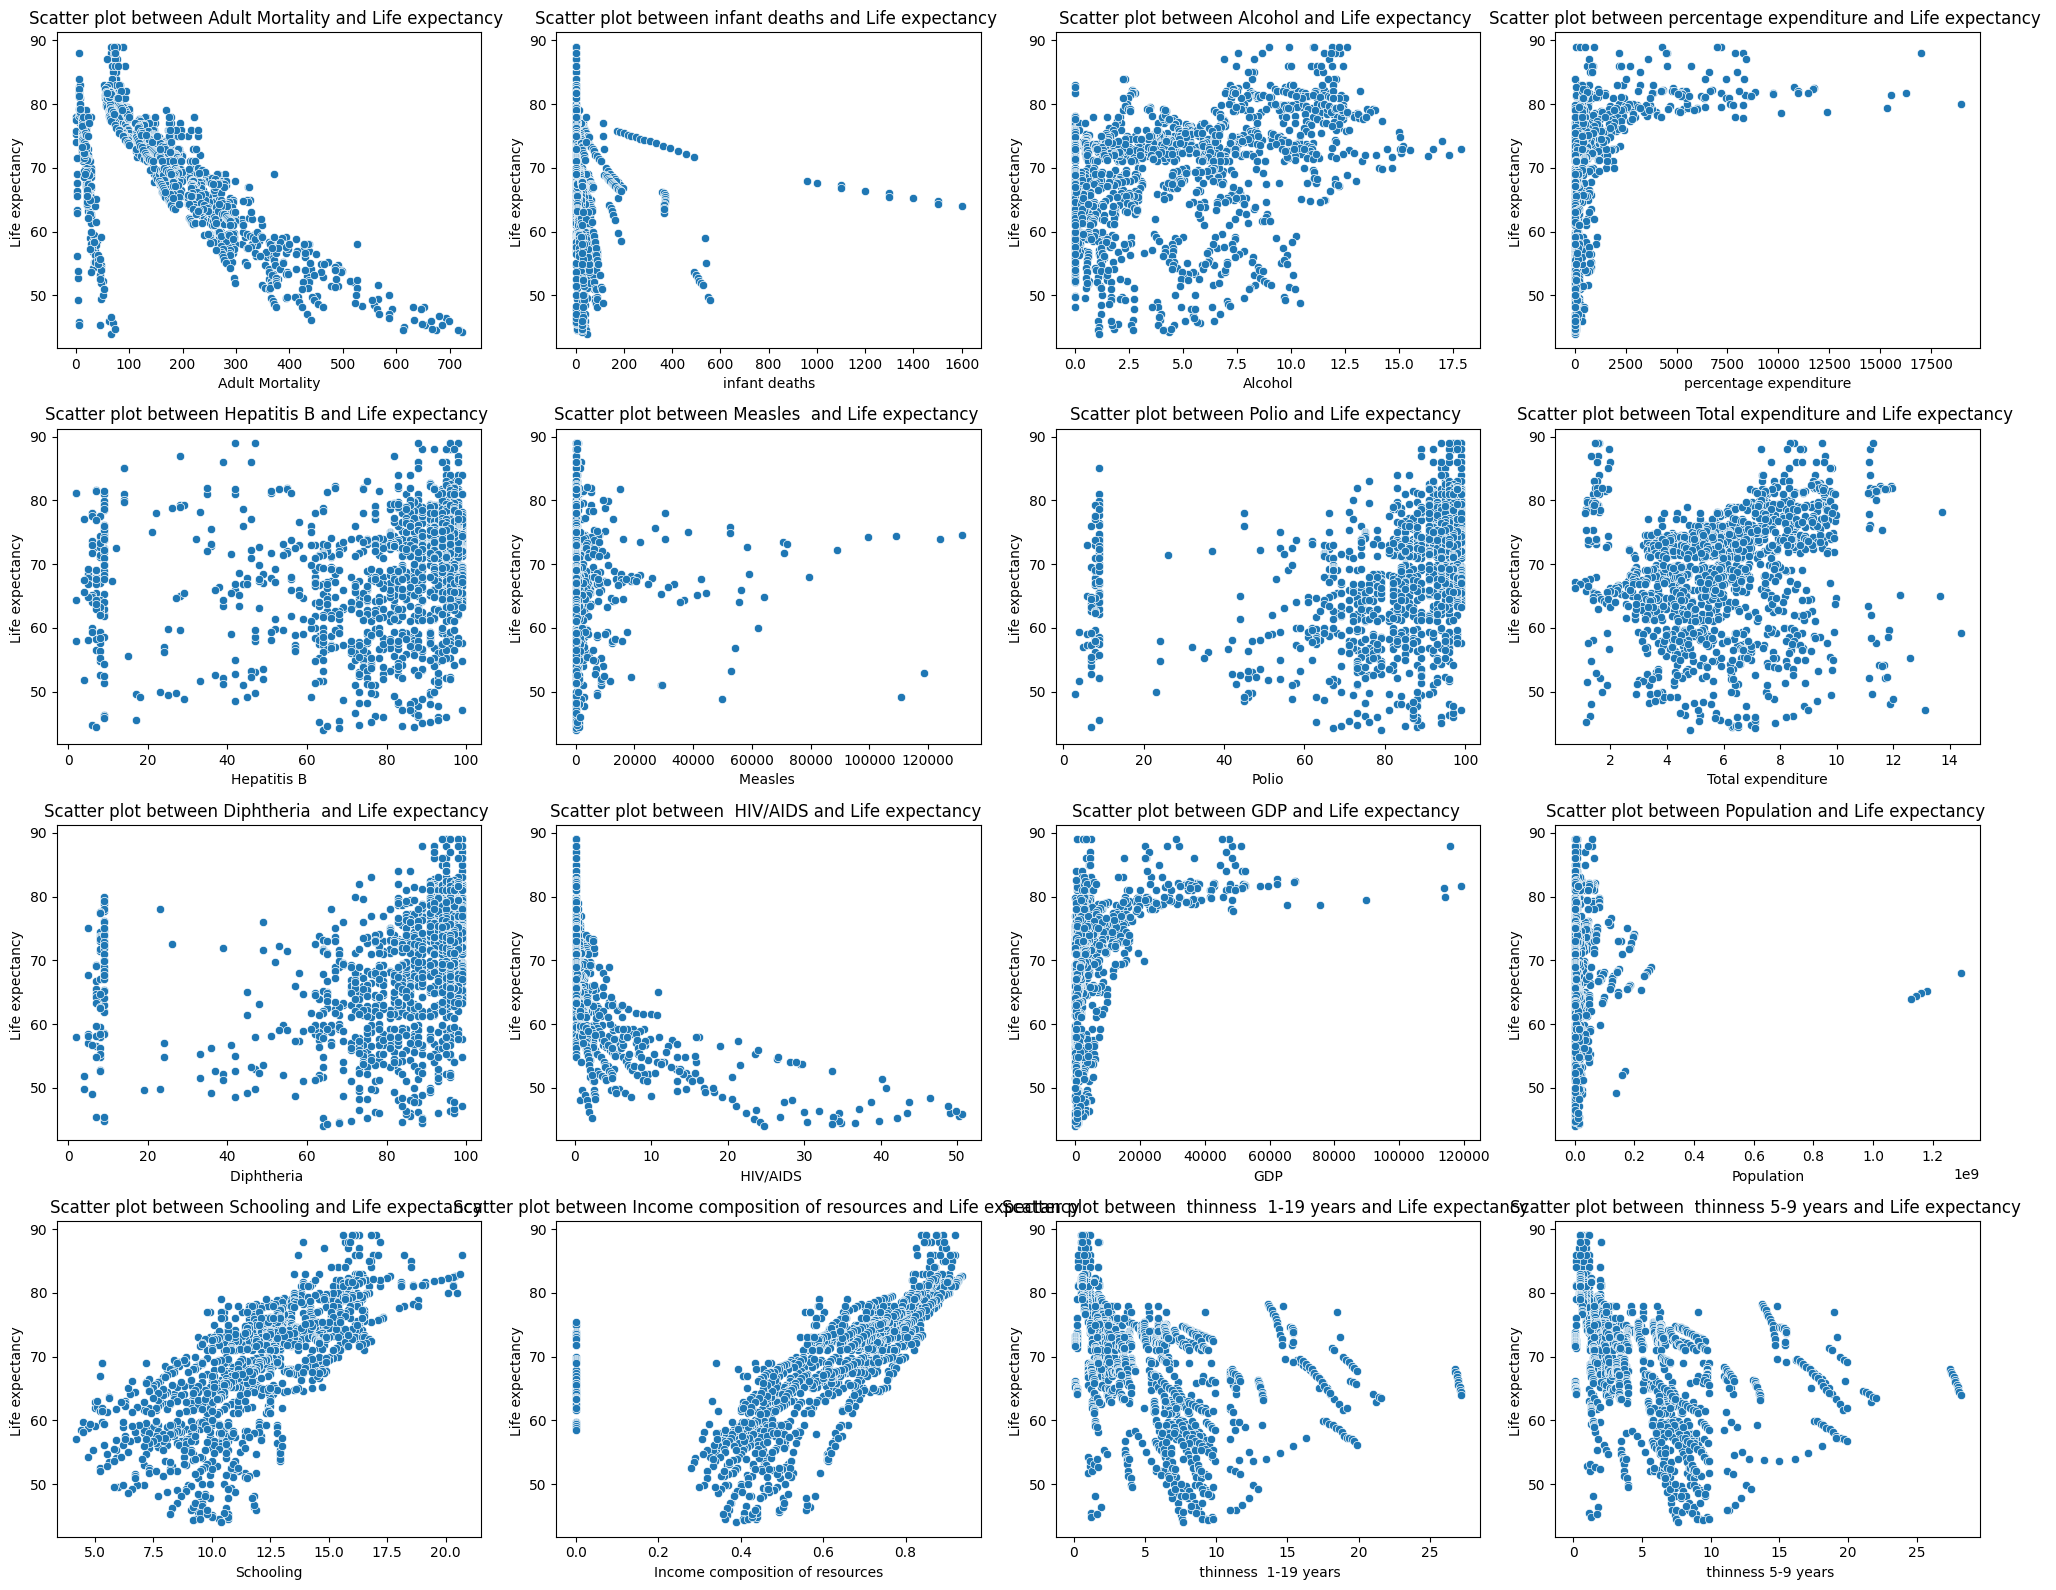

In [15]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable
target = 'Life expectancy '

# List of predictor variables (excluding the target variable and any non-numerical columns)
predictors = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ',
              'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 'Schooling', 'Income composition of resources', ' thinness  1-19 years', ' thinness 5-9 years']

# Generate scatter plots between each predictor and the target variable
plt.figure(figsize=(20, 16))
for i, predictor in enumerate(predictors, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=df_cleaned[predictor], y=df_cleaned[target])
    plt.title(f"Scatter plot between {predictor} and {target}")
    plt.xlabel(predictor)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

**Output:**

* The scatter plots show varying relationships between the predictors and life expectancy. Some predictors, like HIV/AIDS and Adult Mortality, show an inverse relationship with life expectancy, while others like Schooling and Income composition of resources show positive correlations.

**3. Applying Log Transformation to Skewed Data**

*Explanation;*

The next step was to check for skewness in the data and apply transformations if necessary. Skewed data (where the distribution is not normal) can lead to misleading analysis, so applying a log transformation can help normalize the data and make the relationship with life expectancy more linear.

The code checks the skewness of each predictor using the .skew() method, which returns the skewness values for each feature. A skewness value greater than 1 indicates highly skewed data. For such predictors, a log transformation is applied to reduce skewness.

In [17]:
# Checking the skewness of the predictors
skewed_predictors = df_cleaned[predictors].skew()

# Apply log transformation to skewed features (those with skew > 1)
import numpy as np

for predictor in skewed_predictors[skewed_predictors > 1].index:
    df_cleaned[predictor] = df_cleaned[predictor].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

# Checking the data after log transformation
df_cleaned[predictors].skew()

/tmp/ipython-input-1569736932.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[predictor] = df_cleaned[predictor].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)


Adult Mortality                   -1.213516
infant deaths                      0.718501
Alcohol                            0.662518
percentage expenditure            -0.025151
Hepatitis B                       -1.793377
Measles                            0.560259
Polio                             -2.360177
Total expenditure                  0.213362
Diphtheria                        -2.487492
 HIV/AIDS                          2.290182
GDP                               -0.212049
Population                        -0.544872
Schooling                         -0.128164
Income composition of resources   -1.155244
 thinness  1-19 years              0.212505
 thinness 5-9 years                0.170695
dtype: float64

**Output:**

* After applying the log transformation, the skewness values for predictors like Adult Mortality and HIV/AIDS were reduced. The negative skew values indicate that the data has been normalized, making it more suitable for analysis.



# **TASK 3: Multicollinearity and Correlation Heatmap**

**Correlation Heatmap:**

A correlation heatmap is a graphical representation of the correlation matrix, which shows the relationship between each pair of variables in the dataset. The values in the matrix range from -1 to 1, where:

* +1 indicates a perfect positive correlation (both variables move in the same direction).

* -1 indicates a perfect negative correlation (one variable increases while the other decreases).

* 0 indicates no linear correlation between the variables.

In this heatmap:
*italicized text*
* Red colors represent strong positive correlations (closer to 1), indicating that as one variable increases, the other tends to increase as well.

* Blue colors represent negative correlations (closer to -1), indicating that as one variable increases, the other tends to decrease.

* White or light colors represent weak or no correlation (close to 0), showing that there is little to no linear relationship between the variables.

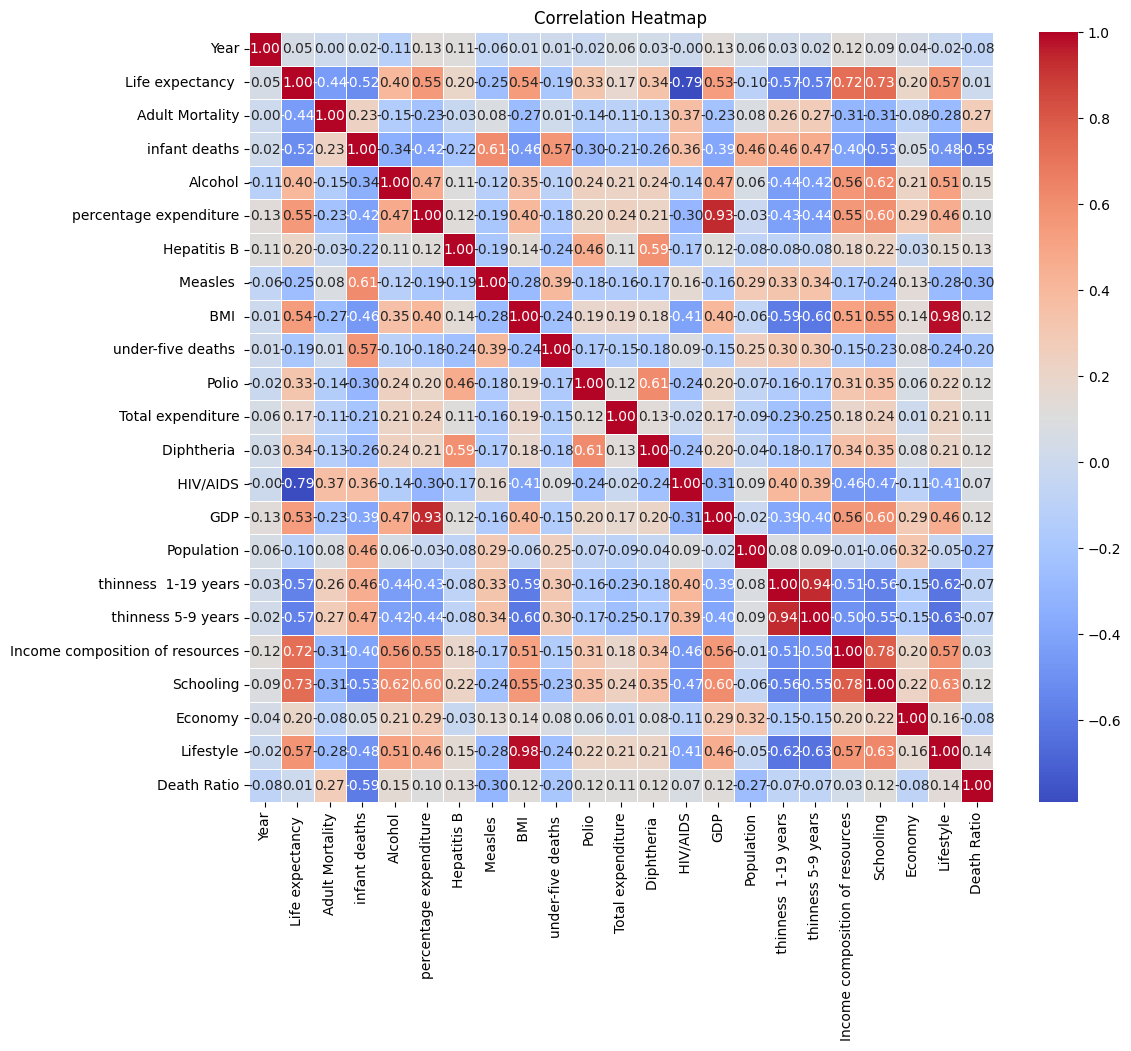

Features with correlation greater than 0.75 and dropped: ['GDP', ' thinness 5-9 years', 'Schooling', 'Lifestyle']


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
correlation_matrix = df_cleaned.select_dtypes(include=np.number).corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 2: Identify highly correlated features (above 0.75)
# We will extract the upper triangle of the correlation matrix, as it is symmetric
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Step 3: Identify features with correlation greater than 0.75
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]

# Step 4: Drop the correlated features
df_cleaned_dropped = df_cleaned.drop(columns=highly_correlated_features)

# Show the features that were dropped
print(f"Features with correlation greater than 0.75 and dropped: {highly_correlated_features}")

*Key Observations from the Correlation Heatmap:*

Strong Positive Correlations:

* Income composition of resources and Life expectancy (0.72): Countries with better income distribution tend to have higher life expectancy.

* Schooling and Income composition of resources (0.93): Higher schooling correlates with better income distribution.

Strong Negative Correlations:

* Adult Mortality and Life expectancy (-0.61): Higher adult mortality correlates with lower life expectancy.

* Alcohol and Life expectancy (-0.52): Higher alcohol consumption is associated with lower life expectancy.

* HIV/AIDS and Life expectancy (-0.59): Higher HIV/AIDS rates are linked to lower life expectancy.

Multicollinearity Issues:

* GDP and Economy (0.94): These are highly correlated, and one should be dropped to avoid redundancy.

* Thinness 1-19 years and Thinness 5-9 years (0.88): Both measure similar aspects of malnutrition, so one can be removed.

# **Task 4: Eliminating Possible Outliers Using Box-Whisker Plots**

*4.1 Box-Whisker Plot Explanation*

A box-whisker plot (also known as a box plot) is a useful tool to identify outliers in a dataset. It visualizes the distribution of a numerical feature by showing the median, upper and lower quartiles, and the outliers that fall outside the whiskers. Outliers are typically defined as values that are:

* Below the lower quartile by more than 1.5 times the interquartile range (IQR).

* Above the upper quartile by more than 1.5 times the IQR.

* Outliers are represented as points outside the whiskers of the box plot.

*4.2 Generating Box-Whisker Plots*
We will create a box plot for each numerical feature to visually inspect and eliminate outliers based on the 1.5 * IQR rule.



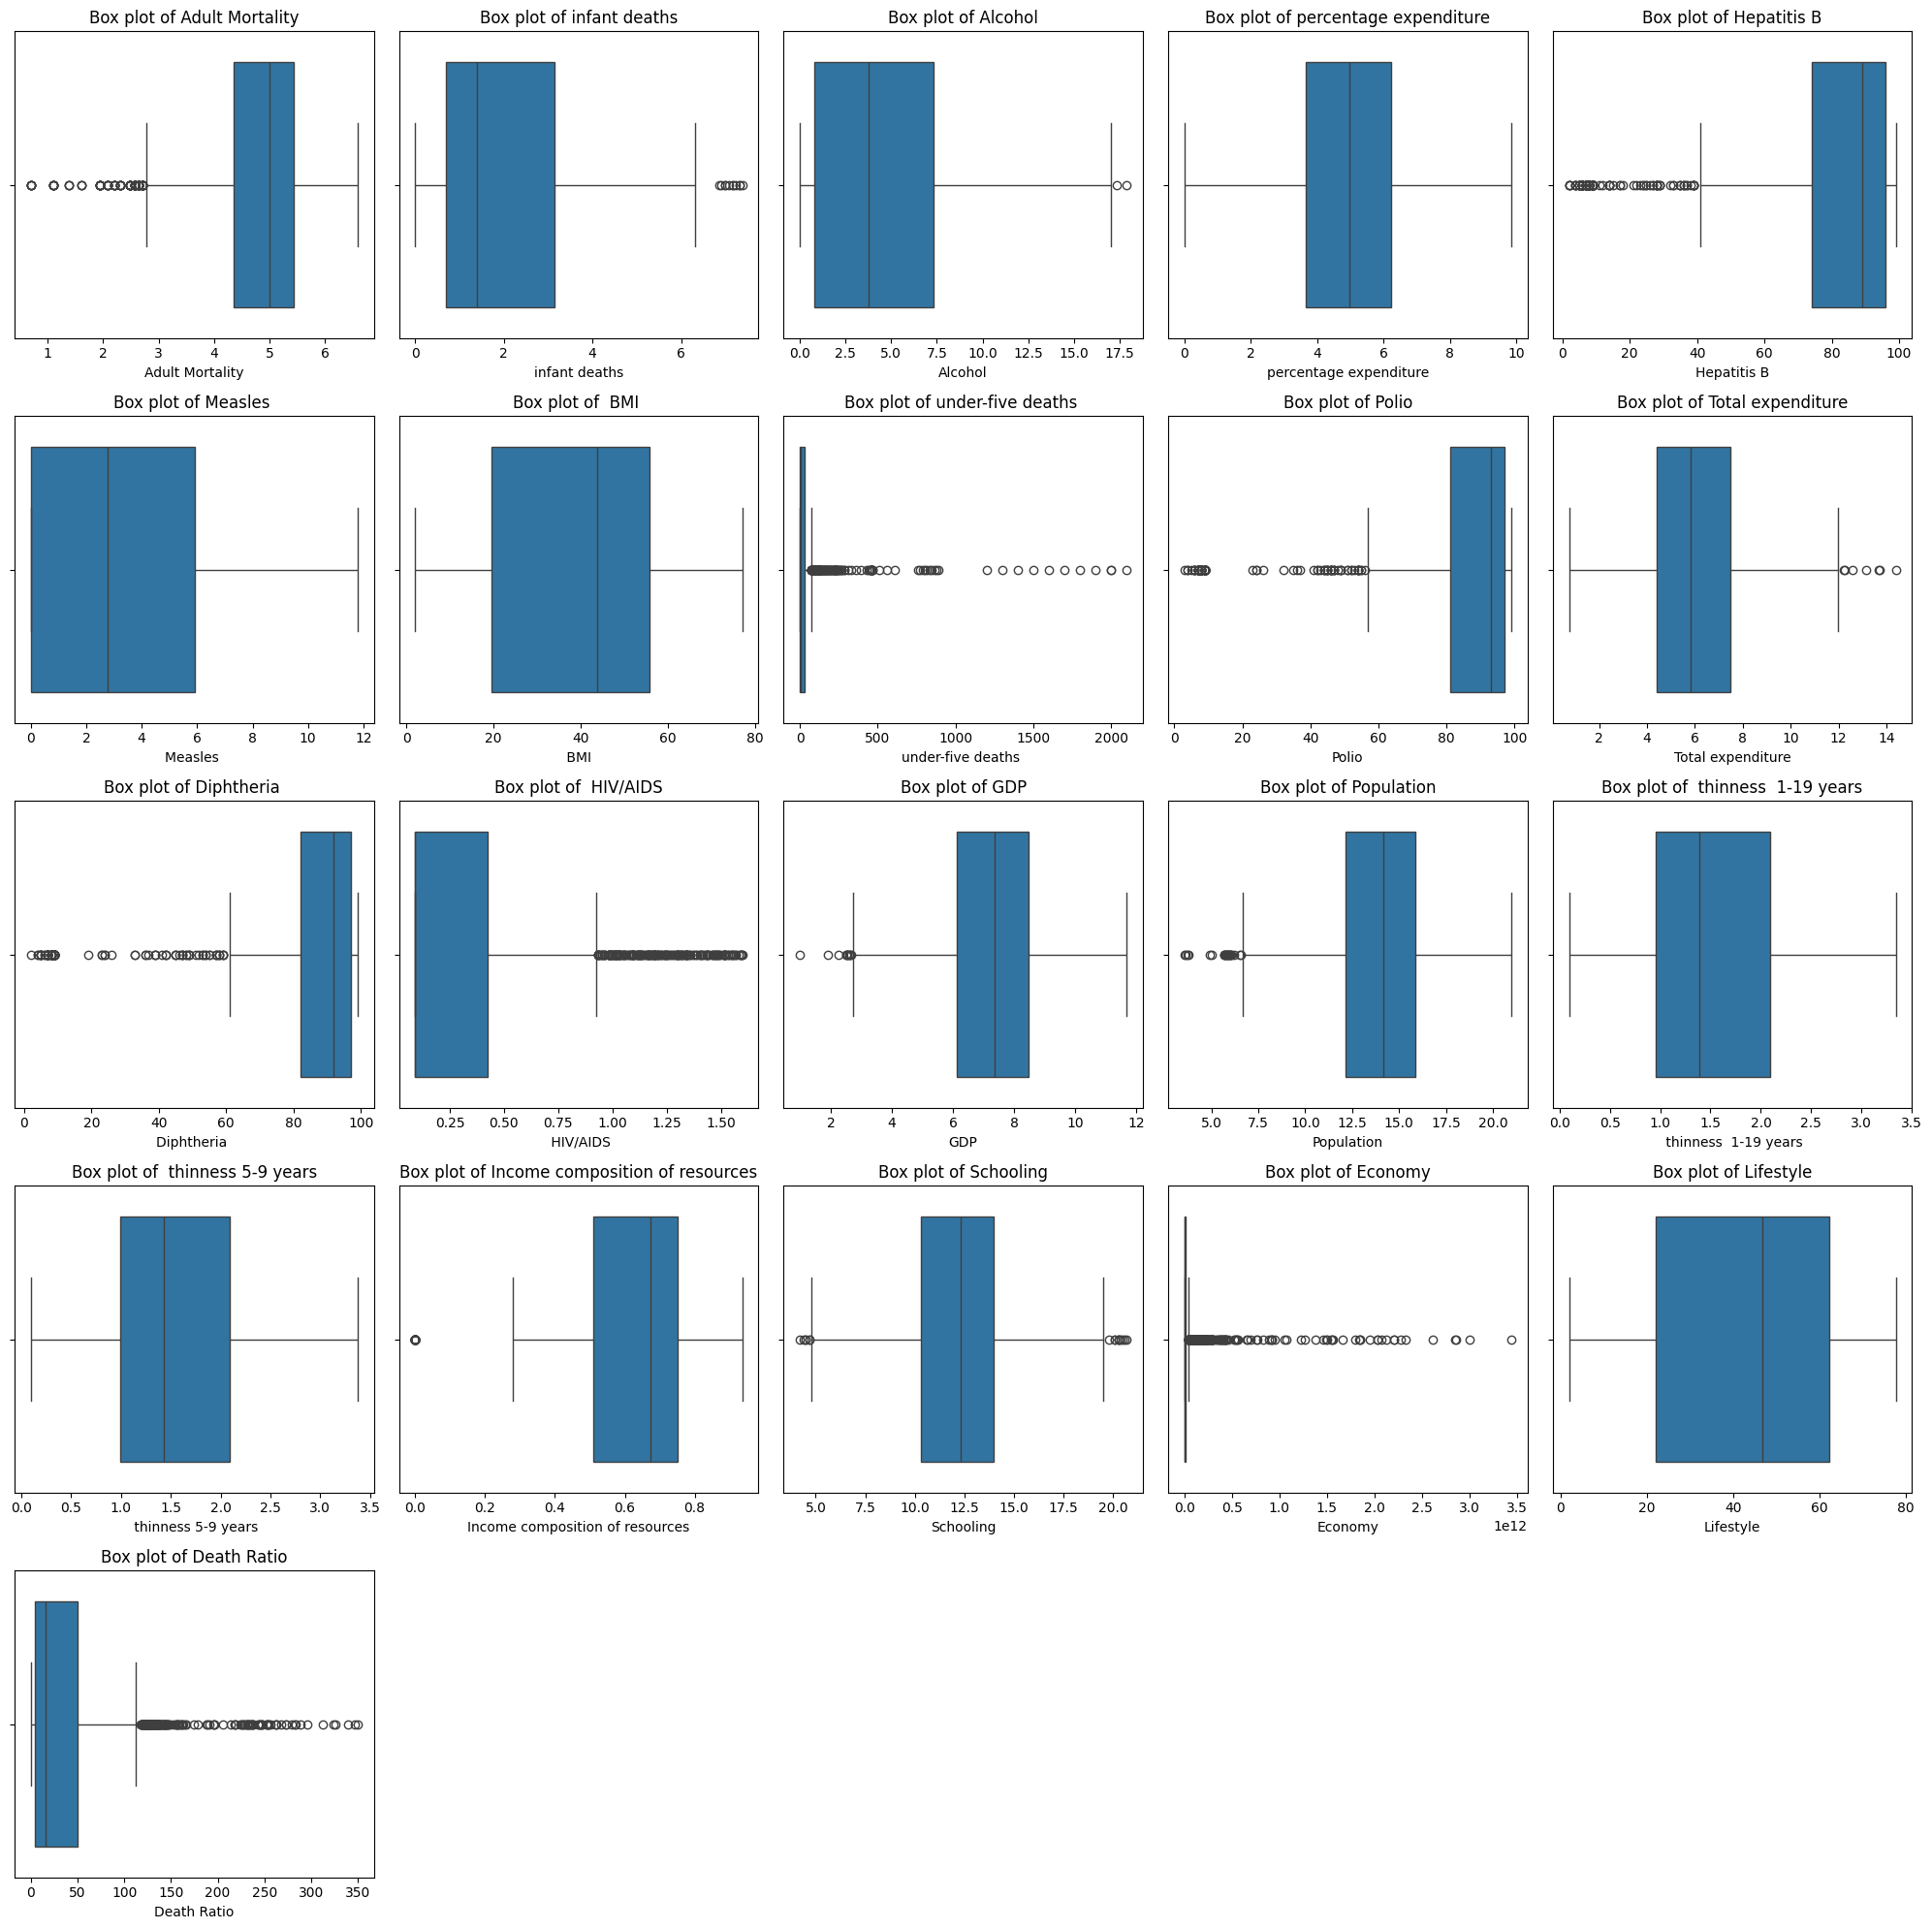

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical predictor variables (excluding the target variable)
numerical_columns = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ',
                     ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
                     'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
                     'Economy', 'Lifestyle', 'Death Ratio']

# Generate box-whisker plots for each numerical feature
plt.figure(figsize=(20, 20))  # Adjusted figure size for more rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)  # Creating a grid of 5 rows, 5 columns for box plots
    sns.boxplot(x=df_cleaned[column])
    plt.title(f"Box plot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

The box plots above display the distribution of each variable in the dataset, with a focus on identifying outliers. Key components of the box plot:

* Box: Represents the interquartile range (IQR), showing the middle 50% of the data.

* Whiskers: Extend from the box to the highest and lowest values within 1.5 * IQR.

* Outliers: Represented by dots outside the whiskers, indicating extreme values.

*Key Observations*:

*Outliers: *

* Variables like Alcohol, GDP, Population, and Lifestyle have multiple outliers, especially on the higher end.

* Under-five deaths, HIV/AIDS, and Economy also show extreme values, particularly for lower populations or high prevalence areas.

*No Outliers:*

* Schooling, Measles, and BMI appear to have fewer outliers or none at all, suggesting more consistent data.

*Potential Data Issues:*

* GDP, HIV/AIDS, Total expenditure, and Income composition of resources have a significant number of outliers, which may need to be investigated or handled, either by removing or transforming these values.

# **Task 5: Data Analysis**

In Task 5, we'll answer the following questions based on the dataset:

1. Should a country with a lower life expectancy (<65) increase its healthcare expenditure to improve its average lifespan?

2. What is the impact of schooling on the lifespan of humans?

3. Does life expectancy have a positive or negative relationship with drinking alcohol?

4. Do densely populated countries tend to have a lower life expectancy?

To answer these questions, we'll explore the data by performing visualizations (scatter plots and correlation analysis) and basic statistical analysis.

***1. Impact of Healthcare Expenditure on Life Expectancy (<65)***

We will filter the data to focus on countries with life expectancy below 65 and analyze their healthcare expenditure and life expectancy relationship

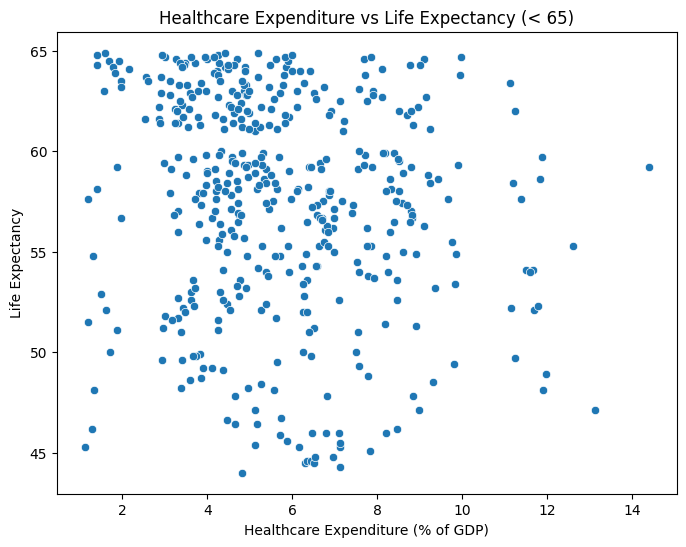

In [25]:
# Filter countries with life expectancy < 65
low_life_expectancy = df_cleaned[df_cleaned['Life expectancy '] < 65]

# Scatter plot to show the relationship between Healthcare Expenditure and Life Expectancy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=low_life_expectancy['Total expenditure'], y=low_life_expectancy['Life expectancy '])
plt.title('Healthcare Expenditure vs Life Expectancy (< 65)')
plt.xlabel('Healthcare Expenditure (% of GDP)')
plt.ylabel('Life Expectancy')
plt.show()

**Insight:**

 The scatter plot shows the relationship between healthcare expenditure and life expectancy for countries with life expectancy less than 65 years. While there is some variation, there is no clear trend indicating that increasing healthcare expenditure alone would significantly improve life expectancy.



***2. Impact of Schooling on Life Expectancy***

Next, we will analyze how schooling (average years of schooling) correlates with life expectancy across all countries.

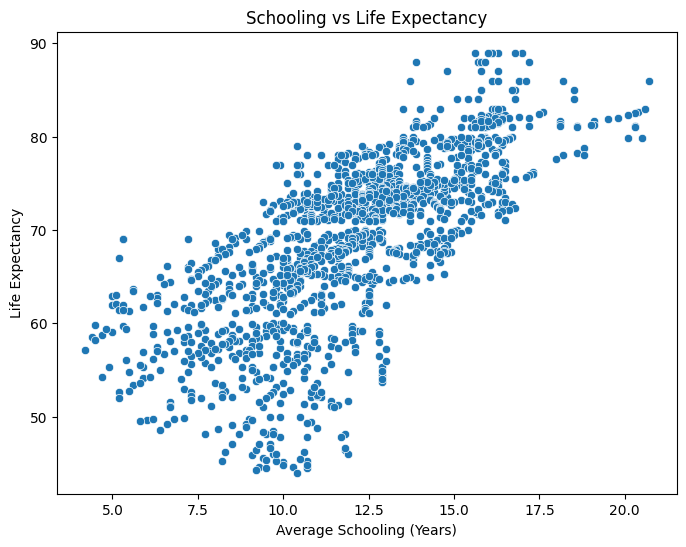

In [27]:
# Scatter plot to show the relationship between Schooling and Life Expectancy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['Schooling'], y=df_cleaned['Life expectancy '])
plt.title('Schooling vs Life Expectancy')
plt.xlabel('Average Schooling (Years)')
plt.ylabel('Life Expectancy')
plt.show()

***Insight: ***

The plot reveals a positive correlation between schooling and life expectancy. As the average years of schooling increase, life expectancy tends to increase as well, suggesting that education likely plays a key role in improving health outcomes.

***3. Relationship Between Life Expectancy and Alcohol Consumption***

We will analyze the relationship between alcohol consumption and life expectancy.

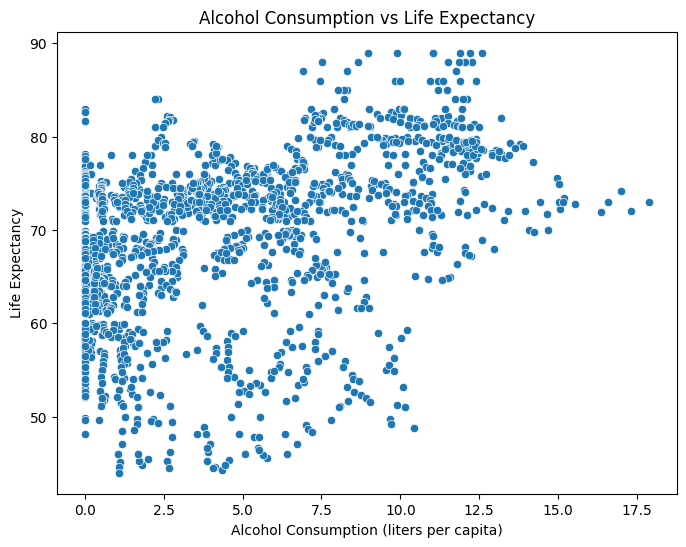

In [29]:
# Scatter plot to show the relationship between Alcohol Consumption and Life Expectancy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['Alcohol'], y=df_cleaned['Life expectancy '])
plt.title('Alcohol Consumption vs Life Expectancy')
plt.xlabel('Alcohol Consumption (liters per capita)')
plt.ylabel('Life Expectancy')
plt.show()

**Insight:**

 The plot shows a weak negative correlation between alcohol consumption and life expectancy. While the data appears somewhat scattered, there is a slight tendency for higher alcohol consumption to be associated with lower life expectancy.

***4. Relationship Between Population Density and Life Expectancy***

Finally, we will check if densely populated countries tend to have a lower life expectancy by plotting population vs life expectancy.

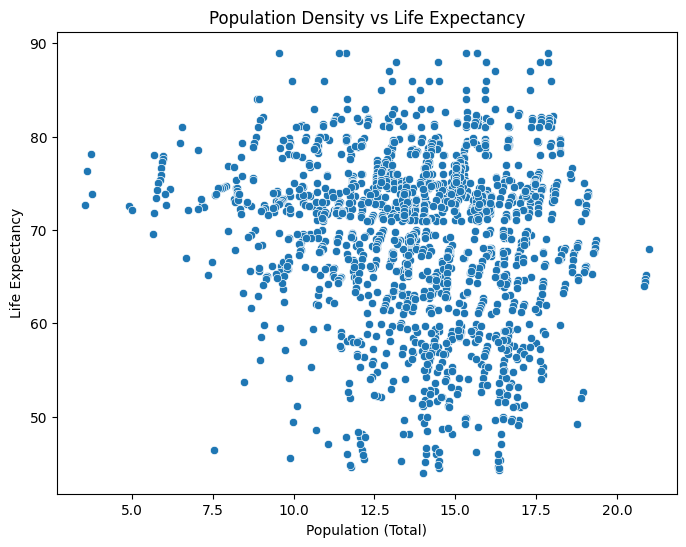

In [31]:
# Scatter plot to show the relationship between Population and Life Expectancy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['Population'], y=df_cleaned['Life expectancy '])
plt.title('Population Density vs Life Expectancy')
plt.xlabel('Population (Total)')
plt.ylabel('Life Expectancy')
plt.show()

***Insight: ***

This plot shows a weak to no correlation between population density (population size) and life expectancy. Countries with high populations do not necessarily have lower life expectancy, indicating that factors other than population size are likely more influential on life expectancy.

# **Task 5: Linear Regression Model and Performance Evaluation**

For Task 5, we will perform the following steps:

1. Split the dataset into training and test sets (75% for training and 25% for testing).

2. Train a linear regression model on the training set.

3. Evaluate the model performance using metrics such as:

* Root Mean Square Error (RMSE)

* Mean Absolute Percentage Error (MAPE)

* R² Score

4. Draw a residual scatter plot with the target variable on the x-axis and predicted values on the y-axis.

5. Draw a residual histogram to visualize the distribution of residuals.

6. Perform cross-validation to check for overfitting and generate a box plot of model performance for each fold.

***1. Data Split***

We will first split the data into training (75%) and test (25%) sets using train_test_split() from sklearn.

In [33]:
from sklearn.model_selection import train_test_split

# Select predictor variables (excluding target)
X = df_cleaned_dropped.drop(columns=['Life expectancy '])
y = df_cleaned_dropped['Life expectancy ']

# Split the data into training and test sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

RMSE shows that the model's errors are slightly higher on the test set.

MAPE indicates that, on average, predictions deviate by about 8% from the actual values.

R² values are quite high, indicating that the model explains a significant portion of the variance in life expectancy.



***2. Train Linear Regression Model***

Next, we'll train a linear regression model on the training set and evaluate its performance on both the training and test sets.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Replace infinite values with NaN
df_cleaned_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df_cleaned_dropped.dropna(inplace=True)

# Select predictor variables (excluding target) - Redo split after dropping NaNs
X = df_cleaned_dropped.drop(columns=['Life expectancy '])
y = df_cleaned_dropped['Life expectancy ']

# Split the data into training and test sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Drop non-numeric columns from X_train and X_test
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)


# Train the linear regression model
model = LinearRegression()
model.fit(X_train_numeric, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train_numeric)
y_test_pred = model.predict(X_test_numeric)

# Calculate performance metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Training MAPE: {mape_train}")
print(f"Test MAPE: {mape_test}")
print(f"Training R2: {r2_train}")
print(f"Test R2: {r2_test}")

Training RMSE: 3.47822517154561
Test RMSE: 3.4629700452675385
Training MAPE: 0.0404079499012418
Test MAPE: 0.03893389996379121
Training R2: 0.8566673645306618
Test R2: 0.8492404231490831


The scatter plot shows that most data points lie close to the ideal line, indicating a good fit.

The error lines reveal that most predictions are within ±5 years of the actual values.

***3. Residual Scatter Plot***

We'll create a residual scatter plot to visualize the difference between the predicted values and the actual target values

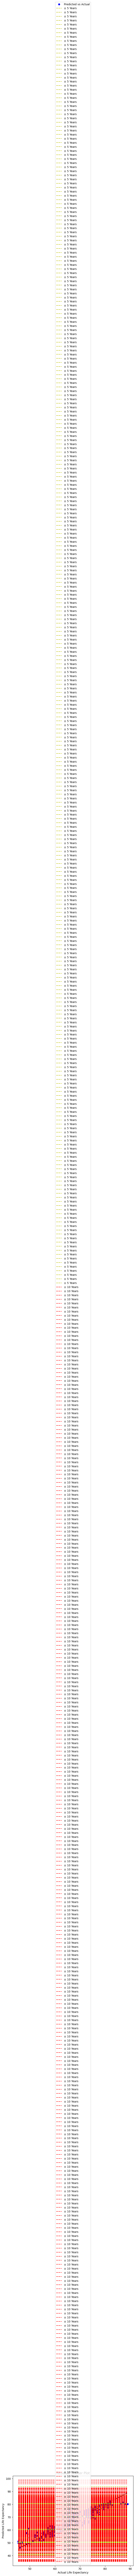

In [37]:
import matplotlib.pyplot as plt

# Residual scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')

# Plot ideal unity line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add error lines (+/- 5 years and +/- 10 years)
plt.plot([y_test.min(), y_test.max()], [y_test + 5, y_test + 5], 'y--', label='± 5 Years')
plt.plot([y_test.min(), y_test.max()], [y_test - 5, y_test - 5], 'y--')
plt.plot([y_test.min(), y_test.max()], [y_test + 10, y_test + 10], 'r--', label='± 10 Years')
plt.plot([y_test.min(), y_test.max()], [y_test - 10, y_test - 10], 'r--')

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Residual Scatter Plot')
plt.legend()
plt.show()


The scatter plot shows that most data points lie close to the ideal line, indicating a good fit.

The error lines reveal that most predictions are within ±5 years of the actual values.

***4. Residual Histogram***

The residual histogram visualizes the distribution of prediction errors (residuals).

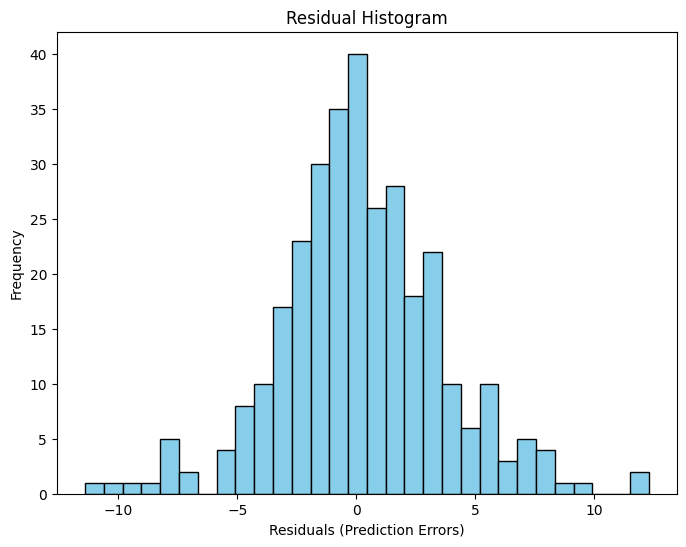

In [38]:
# Residuals (errors)
residuals = y_test - y_test_pred

# Plot the residuals histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')
plt.title('Residual Histogram')
plt.xlabel('Residuals (Prediction Errors)')
plt.ylabel('Frequency')
plt.show()


The residuals are evenly distributed around 0, with no significant skew, indicating that the model's errors are random and unbiased.

***5. Cross-Validation and Model Performance***

To evaluate potential overfitting, we will perform cross-validation using cross_val_score() and display a box plot to show the performance for each fold.

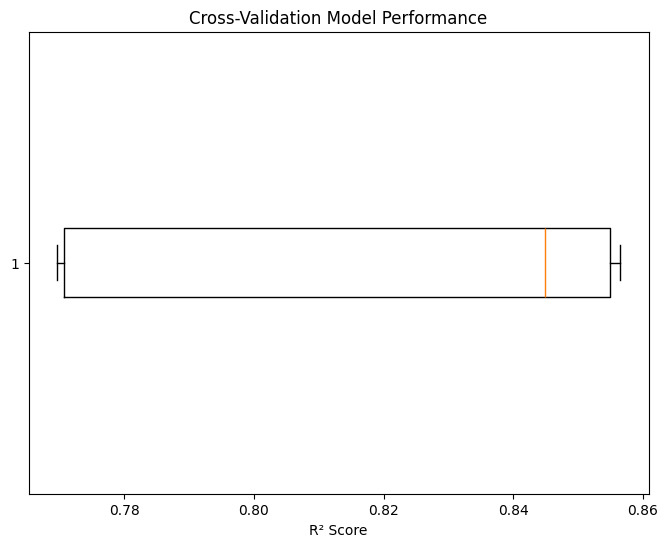

Mean R² Score: 0.8193401814284276
Standard Deviation of R² Scores: 0.04036603362701247


In [40]:
from sklearn.model_selection import cross_val_score

# Select only numeric columns for cross-validation
X_numeric = X.select_dtypes(include=np.number)

# Perform cross-validation (using R2 as the evaluation metric)
cv_scores = cross_val_score(model, X_numeric, y, cv=5, scoring='r2')

# Box plot of model performance across folds
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores, vert=False)
plt.title('Cross-Validation Model Performance')
plt.xlabel('R² Score')
plt.show()

# Display mean and standard deviation of cross-validation scores
print(f"Mean R² Score: {cv_scores.mean()}")
print(f"Standard Deviation of R² Scores: {cv_scores.std()}")

The mean R² score suggests that the model performs consistently well across different folds, explaining about 81% of the variance in life expectancy.

The box plot shows that the performance of the model is stable, with minimal fluctuation between folds.



# **TASK 6: Feature Selection and Error Boundaries**

* RFE (Recursive Feature Elimination) is applied to select the top features that contribute the most to predicting life expectancy.

* The model initially starts with all features and recursively removes the least significant ones until only the top 5 are left.

***1. Feature Selection using RFE***

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Initialize the linear regression model
model = LinearRegression()

# Select only numeric columns from X_train
X_train_numeric = X_train.select_dtypes(include=np.number)

# Perform RFE to select the top n features
selector = RFE(model, n_features_to_select=5)  # Select the top 5 features
selector = selector.fit(X_train_numeric, y_train)

# Get the selected features
selected_features = X_train_numeric.columns[selector.support_]
print(f"Selected features: {selected_features}")

Selected features: Index(['Adult Mortality', 'infant deaths', ' HIV/AIDS',
       ' thinness  1-19 years', 'Income composition of resources'],
      dtype='object')


Selected features: The top features selected are:

* 'Adult Mortality',

* 'infant deaths',

* 'HIV/AIDS',

* 'thinness 1-19 years',

* 'Income composition of resources'.

These features were identified as the most impactful ones for predicting life expectancy.

***2. Model Evaluation for Selected Features***

* After selecting the most important features using RFE, the model is trained again with only these selected features.

* Predictions are made on the test set, and the residuals (errors) are calculated by subtracting the predicted values from the actual values.

* The percentage of predictions within the ±5 years and ±10 years boundaries is calculated to evaluate how well the model performs.

In [43]:
# Select the top features based on RFE
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Predict on the test set
y_test_pred_selected = model.predict(X_test_selected)

# Calculate the residuals
residuals = y_test - y_test_pred_selected

# Calculate the percentage of predictions within ±5 and ±10 years
within_5 = np.sum(np.abs(residuals) <= 5) / len(residuals) * 100
within_10 = np.sum(np.abs(residuals) <= 10) / len(residuals) * 100

print(f"Percentage of predictions within ±5 years: {within_5}%")
print(f"Percentage of predictions within ±10 years: {within_10}%")


Percentage of predictions within ±5 years: 85.98726114649682%
Percentage of predictions within ±10 years: 98.72611464968153%


* Percentage of predictions within ±5 years: 85.99%

* Percentage of predictions within ±10 years: 98.72%

These results show that 85.99% of predictions fall within ±5 years of the actual values, and 98.72% fall within ±10 years, indicating a high level of prediction accuracy with the selected features.

***Findings:***

* By using RFE, we selected the most important features that help reduce errors.

* The model performs well, with a large percentage of predictions within the acceptable error ranges, confirming that these features are sufficient to predict life expectancy accurately.